In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

# Import the training set

In [2]:
data_set = pd.read_csv('Google_Stock_Price_Train.csv')
data_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#to create a numpy array
training_set = data_set.iloc[:, 1:2].values
training_set.shape

(1258, 1)

# Feature scaling - Normalisation

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [5]:
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Creating a data structure with 60 timesteps and 1 output

In [6]:
#the model will look to the last 60 days of the stock price and then try to predict the next day
x_train = []
y_train = []

for i in range (120,1258):
    x_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
    

## Reshaping the data

In [7]:
#the last argument is the number of indicators, in this we just have the open price therefore is 1
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Part 2: Building the RNN

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialize the RNN

In [9]:
regressor = Sequential()

### Adding the first LSTM layer and some Droput regularisation

In [10]:
regressor.add(
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1))
)
regressor.add(
#this means that 20% of the LSTM neuron will be dropout during each iteration to prevent overfitting
    Dropout(0.2)
)

### Adding the second LSTM layer and some Droput regularisation

In [11]:
regressor.add(
    LSTM(units=50, return_sequences=True)
)
regressor.add(
    Dropout(0.2)
)

### Adding the third LSTM layer and some Droput regularisation

In [12]:
regressor.add(
    LSTM(units=50, return_sequences=True)
)
regressor.add(
    Dropout(0.2)
)

### Adding the fourth LSTM layer and some Droput regularisation

In [13]:
regressor.add(
    #the return sequences is false bc the next layer is going to be the output layer
    LSTM(units=50)
)
regressor.add(
    Dropout(0.2)
)

### Adding the output layer

In [14]:
regressor.add(
    Dense(units=1)
)

## Compiling the RNN

In [15]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

## Fitting the RNN with the training set

In [16]:
regressor.fit(x=x_train, y=y_train, epochs=100, batch_size=32)

Epoch 1/100
36/36 [==============================] - 10s 150ms/step - loss: 0.1327
Epoch 2/100
36/36 [==============================] - 5s 136ms/step - loss: 0.0093
Epoch 3/100
36/36 [==============================] - 6s 154ms/step - loss: 0.0057
Epoch 4/100
36/36 [==============================] - 5s 150ms/step - loss: 0.0055
Epoch 5/100
36/36 [==============================] - 6s 154ms/step - loss: 0.0051
Epoch 6/100
36/36 [==============================] - 5s 147ms/step - loss: 0.0052
Epoch 7/100
36/36 [==============================] - 6s 172ms/step - loss: 0.0058
Epoch 8/100
36/36 [==============================] - 7s 191ms/step - loss: 0.0051
Epoch 9/100
36/36 [==============================] - 7s 190ms/step - loss: 0.0049
Epoch 10/100
36/36 [==============================] - 7s 200ms/step - loss: 0.0044
Epoch 11/100
36/36 [==============================] - 7s 193ms/step - loss: 0.0041
Epoch 12/100
36/36 [==============================] - 6s 172ms/step - loss: 0.0046
Epoch 13/100

36/36 [==============================] - 6s 170ms/step - loss: 0.0015
Epoch 100/100
36/36 [==============================] - 7s 185ms/step - loss: 0.0016


# Part 3: Making the predictions and visualizing the results

## Getting the real stock price of 2017

In [17]:
real_price_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_price_set.head

<bound method NDFrame.head of          Date    Open    High     Low   Close     Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2    1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3    1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4    1/9/2017  806.40  809.97  802.83  806.65  1,272,400
5   1/10/2017  807.86  809.13  803.51  804.79  1,176,800
6   1/11/2017  805.00  808.15  801.37  807.91  1,065,900
7   1/12/2017  807.14  807.39  799.17  806.36  1,353,100
8   1/13/2017  807.48  811.22  806.69  807.88  1,099,200
9   1/17/2017  807.08  807.14  800.37  804.61  1,362,100
10  1/18/2017  805.81  806.21  800.99  806.07  1,294,400
11  1/19/2017  805.12  809.48  801.80  802.17    919,300
12  1/20/2017  806.91  806.91  801.69  805.02  1,670,000
13  1/23/2017  807.25  820.87  803.74  819.31  1,963,600
14  1/24/2017  822.30  825.90  817.82  823.87  1,474,000
15  1/25/2017  829.62  835.77  825.06  835.67  1,494,500
1

In [18]:
test_data_set = real_price_set.iloc[:,1:2].values
test_data_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

## Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((data_set['Open'], real_price_set['Open']), axis=0)

In [20]:
inputs = dataset_total[len(dataset_total)-len(real_price_set)-120:].values 
inputs

array([723.62, 721.58, 725.73, 722.71, 729.89, 737.33, 740.36, 741.86,
       740.67, 739.04, 738.28, 747.04, 772.71, 761.09, 768.69, 767.18,
       772.22, 773.78, 782.  , 781.1 , 783.75, 785.  , 781.5 , 783.75,
       780.3 , 777.32, 780.01, 775.  , 773.27, 775.48, 770.58, 767.  ,
       769.  , 768.74, 769.33, 767.01, 769.25, 773.01, 773.45, 780.  ,
       778.59, 770.1 , 755.13, 764.48, 759.61, 762.89, 769.75, 772.42,
       769.  , 772.66, 780.  , 786.59, 782.74, 775.5 , 777.85, 781.44,
       776.33, 774.25, 776.03, 779.31, 779.  , 779.66, 777.71, 786.66,
       783.76, 781.22, 781.65, 779.8 , 787.85, 798.24, 803.3 , 795.  ,
       804.9 , 816.68, 806.34, 801.  , 808.35, 795.47, 782.89, 778.2 ,
       767.25, 750.66, 774.5 , 783.4 , 779.94, 791.17, 756.54, 755.6 ,
       746.97, 755.2 , 766.92, 771.37, 762.61, 772.63, 767.73, 764.26,
       760.  , 771.53, 770.07, 757.44, 744.59, 757.71, 764.73, 761.  ,
       772.48, 780.  , 785.04, 793.9 , 797.4 , 797.34, 800.4 , 790.22,
      

In [21]:
inputs = inputs.reshape(-1,1)
inputs

array([[723.62],
       [721.58],
       [725.73],
       [722.71],
       [729.89],
       [737.33],
       [740.36],
       [741.86],
       [740.67],
       [739.04],
       [738.28],
       [747.04],
       [772.71],
       [761.09],
       [768.69],
       [767.18],
       [772.22],
       [773.78],
       [782.  ],
       [781.1 ],
       [783.75],
       [785.  ],
       [781.5 ],
       [783.75],
       [780.3 ],
       [777.32],
       [780.01],
       [775.  ],
       [773.27],
       [775.48],
       [770.58],
       [767.  ],
       [769.  ],
       [768.74],
       [769.33],
       [767.01],
       [769.25],
       [773.01],
       [773.45],
       [780.  ],
       [778.59],
       [770.1 ],
       [755.13],
       [764.48],
       [759.61],
       [762.89],
       [769.75],
       [772.42],
       [769.  ],
       [772.66],
       [780.  ],
       [786.59],
       [782.74],
       [775.5 ],
       [777.85],
       [781.44],
       [776.33],
       [774.25],
       [776.03

In [22]:
inputs = sc.transform(inputs)
inputs

array([[0.82688444],
       [0.82308952],
       [0.83080958],
       [0.82519161],
       [0.83854826],
       [0.85238857],
       [0.85802515],
       [0.86081554],
       [0.85860183],
       [0.85556961],
       [0.85415582],
       [0.87045167],
       [0.91820448],
       [0.89658829],
       [0.91072624],
       [0.90791726],
       [0.91729295],
       [0.92019495],
       [0.93548627],
       [0.93381204],
       [0.93874172],
       [0.94106704],
       [0.93455614],
       [0.93874172],
       [0.93232383],
       [0.92678027],
       [0.93178436],
       [0.92246447],
       [0.91924622],
       [0.92335739],
       [0.91424213],
       [0.90758241],
       [0.91130292],
       [0.91081926],
       [0.91191681],
       [0.90760101],
       [0.91176799],
       [0.91876256],
       [0.91958107],
       [0.93176576],
       [0.92914279],
       [0.91334921],
       [0.88550115],
       [0.90289456],
       [0.89383511],
       [0.89993675],
       [0.91269812],
       [0.917

In [23]:
x_test=[]

for i in range(120, 140):
    x_test.append(inputs[i-120:i, 0])
    
x_test = np.array(x_test)

x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
predictions = regressor.predict(x_test)

predictions = sc.inverse_transform(predictions)

In [25]:
predictions

array([[802.37823],
       [799.955  ],
       [799.6466 ],
       [800.4219 ],
       [803.0635 ],
       [808.16156],
       [813.4656 ],
       [816.5628 ],
       [817.9042 ],
       [818.23895],
       [818.10004],
       [817.68243],
       [817.23834],
       [817.3909 ],
       [818.0525 ],
       [821.80927],
       [827.93353],
       [835.1141 ],
       [840.05524],
       [838.3247 ]], dtype=float32)

## Visualizing the results

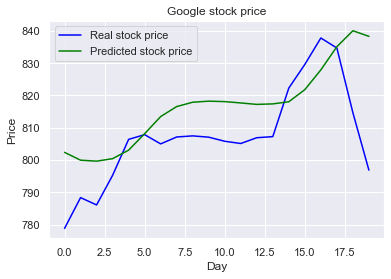

In [26]:
plt.plot(test_data_set, color='blue', label='Real stock price')
plt.plot(predictions, color='green', label='Predicted stock price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Google stock price')
plt.legend()
plt.show()